In [1]:
import pandas as pd
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\muppa\\Tweets_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,timestamp_ms,display_text_range,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,withheld_in_countries,new_Text
0,0,0,Fri Mar 26 16:22:19 +0000 2021,1375483261326135303,1375483261326135303,RT @lesleyanngreen: 50 NOT OUT!!! https://t.co/KibAzagQ0k via @lesleyanngreen @MaryEGater first published Feb 2019 even more relevant now w…,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,NaN,...,1616775739400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rt lesleyanngreen 0 out via lesleyanngreen maryegater first publish feb 0 even more relevant now w
1,2,2,Fri Mar 26 16:22:19 +0000 2021,1375483261128966147,1375483261128966147,RT @glennkirschner2: LAST CALL to sign the letter to all 50 state (&amp; DC) attorneys general urging them to open investigations into Trump &amp;…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,NaN,...,1616775739353,NaN,NaN,1.361354e+18,1.361354e+18,"{'created_at': 'Mon Feb 15 16:38:23 +0000 2021', 'id': 1361354177163780109, 'id_str': '1361354177163780109', 'text': 'Hey friends. Here are 1. the #TeamJustice letter to all 50 state (&amp; DC) at...","{'url': 'https://t.co/ekz7dA1RFY', 'expanded': 'https://twitter.com/glennkirschner2/status/1361354177163780109', 'display': 'twitter.com/glennkirschner…'}",NaN,NaN,rt glennkirschner last call to sign the letter to all 0 state amp dc attorneys general urge PRON to open investigation into trump amp
2,5,5,Fri Mar 26 16:22:19 +0000 2021,1375483261489586176,1375483261489586176,RT @SteveHiltonx: Fauci's defense here is SHOCKINGLY weak\n\nthere is ZERO evidence that the virus jumped to humans from an animal\n\nALL the e…,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,NaN,...,1616775739439,NaN,NaN,1.375465e+18,1.375465e+18,"{'created_at': 'Fri Mar 26 15:09:05 +0000 2021', 'id': 1375464831818600457, 'id_str': '1375464831818600457', 'text': 'Dr. Fauci responds to comments by former CDC Director Dr. Robert Redfield that...","{'url': 'https://t.co/ABiVQuchFL', 'expanded': 'https://twitter.com/cspan/status/1375464831818600457', 'display': 'twitter.com/cspan/status/1…'}",NaN,NaN,rt stevehiltonx faucis defense here be shockingly weak there be zero evidence that the virus jump to human from an animal all the e
3,6,6,Fri Mar 26 16:22:19 +0000 2021,1375483261640671233,1375483261640671233,RT @medicalcorrupt: https://t.co/sEBbRmMF1m\n\nMiss her! Surgical assault victim missing! Why can’t they find her body? It’s total BS !,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,NaN,...,1616775739475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rt medicalcorrupt miss PRON surgical assault victim miss why can not PRON find PRON body PRON total bs
4,10,10,Fri Mar 26 16:22:19 +0000 2021,1375483261862969350,1375483261862969350,RT @AI_Clayton: I cannot see enough of this political suicide from @MattHancock https://t.co/yyjx5AnTX5,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,NaN,...,1616775739528,NaN,NaN,1.375385e+18,1.375385e+18,"{'created_at': 'Fri Mar 26 09:52:33 +0000 2021', 'id': 1375385172061863936, 'id_str': '1375385172061863936', 'text': 'MP: HOW MANY DEAD WITHIN 3 WEEKS OF VACCINE?\n\nHANCOCK: I THINK we know and I...","{'url': 'https://t.co/yyjx5AnTX5', 'expanded': 'https://twitter.com/noreward_norisk/status/1375385172061863936', 'display': 'twitter.com/noreward_noris…'}",NaN,NaN,rt ai_clayton i can not see enough of this political suicide from matthancock


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'created_at', 'id', 'id_str', 'text',
       'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'quote_count', 'reply_count', 'retweet_count',
       'favorite_count', 'entities', 'favorited', 'retweeted',
       'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms',
       'display_text_range', 'extended_tweet', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_entities', 'withheld_in_countries', 'new_Text'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

In [7]:
from tqdm import tqdm

In [8]:
sid_obj = SentimentIntensityAnalyzer()
sentiment_dict=[]
sentiment=[]
for i in tqdm(df.index):
    a = sid_obj.polarity_scores(df['new_Text'][i].strip())
    sentiment_dict.append(a)
    if a['compound'] >= 0.05 : 
        sentiment.append("Positive") 
  
    elif a['compound'] <= - 0.05 : 
        sentiment.append("Negative") 
  
    else : 
        sentiment.append("Neutral")

In [9]:
polarities=pd.DataFrame(sentiment_dict)

In [10]:
new_df=pd.concat([df,polarities],axis=1)

In [11]:
df['sentiment']=sentiment

In [12]:
df['sentiment'].value_counts()

Positive    18959
Negative    14926
Neutral     13142
Name: sentiment, dtype: int64

In [13]:
df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,display_text_range,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,withheld_in_countries,new_Text,sentiment
0,Fri Mar 26 16:22:19 +0000 2021,1375483261326135303,1375483261326135303,RT @lesleyanngreen: 50 NOT OUT!!! https://t.co/KibAzagQ0k via @lesleyanngreen @MaryEGater first published Feb 2019 even more relevant now w…,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rt lesleyanngreen 0 out via lesleyanngreen maryegater first publish feb 0 even more relevant now w,Neutral
1,Fri Mar 26 16:22:19 +0000 2021,1375483261128966147,1375483261128966147,RT @glennkirschner2: LAST CALL to sign the letter to all 50 state (&amp; DC) attorneys general urging them to open investigations into Trump &amp;…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,NaN,NaN,NaN,...,NaN,NaN,1.361354e+18,1.361354e+18,"{'created_at': 'Mon Feb 15 16:38:23 +0000 2021', 'id': 1361354177163780109, 'id_str': '1361354177163780109', 'text': 'Hey friends. Here are 1. the #TeamJustice letter to all 50 state (&amp; DC) at...","{'url': 'https://t.co/ekz7dA1RFY', 'expanded': 'https://twitter.com/glennkirschner2/status/1361354177163780109', 'display': 'twitter.com/glennkirschner…'}",NaN,NaN,rt glennkirschner last call to sign the letter to all 0 state amp dc attorneys general urge PRON to open investigation into trump amp,Neutral
2,Fri Mar 26 16:22:19 +0000 2021,1375483261489586176,1375483261489586176,RT @SteveHiltonx: Fauci's defense here is SHOCKINGLY weak\n\nthere is ZERO evidence that the virus jumped to humans from an animal\n\nALL the e…,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,NaN,NaN,NaN,...,NaN,NaN,1.375465e+18,1.375465e+18,"{'created_at': 'Fri Mar 26 15:09:05 +0000 2021', 'id': 1375464831818600457, 'id_str': '1375464831818600457', 'text': 'Dr. Fauci responds to comments by former CDC Director Dr. Robert Redfield that...","{'url': 'https://t.co/ABiVQuchFL', 'expanded': 'https://twitter.com/cspan/status/1375464831818600457', 'display': 'twitter.com/cspan/status/1…'}",NaN,NaN,rt stevehiltonx faucis defense here be shockingly weak there be zero evidence that the virus jump to human from an animal all the e,Negative
3,Fri Mar 26 16:22:19 +0000 2021,1375483261640671233,1375483261640671233,RT @medicalcorrupt: https://t.co/sEBbRmMF1m\n\nMiss her! Surgical assault victim missing! Why can’t they find her body? It’s total BS !,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rt medicalcorrupt miss PRON surgical assault victim miss why can not PRON find PRON body PRON total bs,Negative
4,Fri Mar 26 16:22:19 +0000 2021,1375483261862969350,1375483261862969350,RT @AI_Clayton: I cannot see enough of this political suicide from @MattHancock https://t.co/yyjx5AnTX5,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,NaN,NaN,NaN,...,NaN,NaN,1.375385e+18,1.375385e+18,"{'created_at': 'Fri Mar 26 09:52:33 +0000 2021', 'id': 1375385172061863936, 'id_str': '1375385172061863936', 'text': 'MP: HOW MANY DEAD WITHIN 3 WEEKS OF VACCINE?\n\nHANCOCK: I THINK we know and I...","{'url': 'https://t.co/yyjx5AnTX5', 'expanded': 'https://twitter.com/noreward_norisk/status/1375385172061863936', 'display': 'twitter.com/noreward_noris…'}",NaN,NaN,rt ai_clayton i can not see enough of this political suicide from matthancock,Negative


In [22]:
temp['sentiment']=df['sentiment'].map({'Negative':'positive','Positive':'negetive','Neutral':'neutral'}).values

In [23]:
temp

0                                                                                                                                                                                                            neutral
1                                                                                                                                                                                                            neutral
2                                                                                                                                                                                                           positive
3                                                                                                                                                                                                           positive
4                                                                                                                                                   

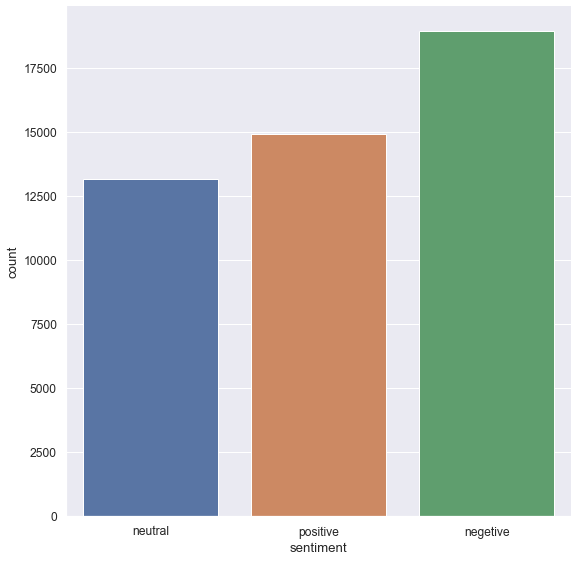

In [24]:
import seaborn as sns
sns.set(font_scale=1.1)
sns.catplot("sentiment", data=temp, kind="count", height=8)

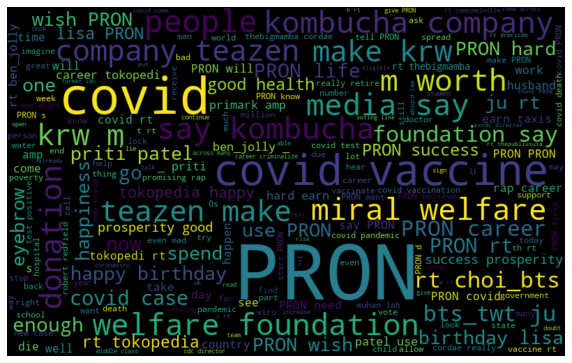

In [25]:
# create text from all tweets
all_words = ' '.join([text for text in df['new_Text']])
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

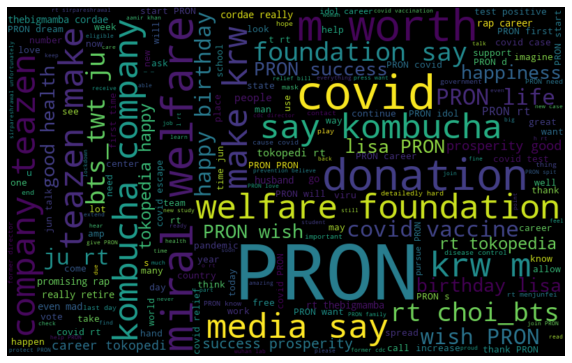

In [26]:
# create text from just positive tweets
normal_words = ' '.join([text for text in df['new_Text'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

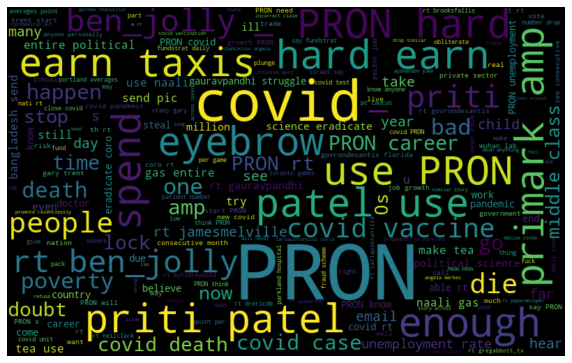

In [27]:
# create text from just positive tweets
normal_words = ' '.join([text for text in df['new_Text'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
display("train shape : ", train.shape)
display("valid shape : ", valid.shape)

'train shape : '

(480024, 14)

'valid shape : '

(120006, 14)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.new_Text.values)
X_valid = vectorizer.transform(valid.new_Text.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

display("X_train.shape : ", X_train.shape)
display("X_train.shape : ", X_valid.shape)
display("y_train.shape : ", y_train.shape)
display("y_valid.shape : ", y_valid.shape)

'X_train.shape : '

(480024, 356491)

'X_train.shape : '

(120006, 356491)

'y_train.shape : '

(480024,)

'y_valid.shape : '

(120006,)

### NAIVE BAYES CLASSIFIER FOR MULTI CLASS CLASSIFICATION

In [40]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
display("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
display("Validation accuracy Score : ",NB_accuracy )
display(classification_report(NB_prediction,y_valid))

'training accuracy Score    : '

0.7769444861090279

'Validation accuracy Score : '

0.7067146642667866

'              precision    recall  f1-score   support\n\n    Negative       0.80      0.67      0.73     52484\n     Neutral       0.42      0.84      0.56     13622\n    Positive       0.77      0.71      0.74     53900\n\n    accuracy                           0.71    120006\n   macro avg       0.67      0.74      0.68    120006\nweighted avg       0.75      0.71      0.72    120006\n'

### Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [41]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
display("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
display("Validation accuracy Score : ",sgd_accuracy )
display(classification_report(sgd_prediction,y_valid))

'Training accuracy Score    : '

0.8842078729396864

'Validation accuracy Score : '

0.8785977367798277

'              precision    recall  f1-score   support\n\n    Negative       0.83      0.90      0.86     40474\n     Neutral       0.92      0.84      0.88     29460\n    Positive       0.90      0.89      0.89     50072\n\n    accuracy                           0.88    120006\n   macro avg       0.88      0.87      0.88    120006\nweighted avg       0.88      0.88      0.88    120006\n'

### RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [45]:
# from sklearn.ensemble import RandomForestClassifier
# rf_clf = RandomForestClassifier()
# rf_clf.fit(X_train,y_train)

# rf_prediction = rf_clf.predict(X_valid)
# rf_accuracy = accuracy_score(y_valid,rf_prediction)
# display("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
# display("Validation accuracy Score : ",rf_accuracy)
# display(classification_report(rf_prediction,y_valid))

### Extreme Gradient Boosting ( For Multiclass Classification)

In [46]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()
xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)

In [47]:
display("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
display("Validation accuracy Score : ",xgb_accuracy)
display(classification_report(xgb_prediction,y_valid))

'Training accuracy Score    : '

0.8164362615202573

'Validation accuracy Score : '

0.8127343632818359

'              precision    recall  f1-score   support\n\n    Negative       0.73      0.87      0.80     36578\n     Neutral       0.93      0.70      0.80     35832\n    Positive       0.82      0.85      0.84     47596\n\n    accuracy                           0.81    120006\n   macro avg       0.83      0.81      0.81    120006\nweighted avg       0.83      0.81      0.81    120006\n'

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)

In [49]:
display("Training accuracy Score    : ",logreg.score(X_train,y_train))
display("Validation accuracy Score : ",logreg_accuracy )
display(classification_report(logreg_prediction,y_valid))

'Training accuracy Score    : '

0.9143876139526357

'Validation accuracy Score : '

0.895538556405513

'              precision    recall  f1-score   support\n\n    Negative       0.87      0.89      0.88     42380\n     Neutral       0.92      0.90      0.91     27504\n    Positive       0.91      0.90      0.90     50122\n\n    accuracy                           0.90    120006\n   macro avg       0.90      0.90      0.90    120006\nweighted avg       0.90      0.90      0.90    120006\n'

In [50]:
models = pd.DataFrame({
    'Model': ['XGBoost', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    'Test accuracy': [ logreg_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,XGBoost,0.895539
2,Naive Bayes,0.878598
3,Stochastic Gradient Decent,0.812734
1,Logistic Regression,0.706715


In [115]:
# new_df.columns

### Sentiment Trends with respect to date on y axis.

In [44]:
df.index=range(0,df.shape[0])

In [51]:
location=[]
for i in range(0,df.shape[0]): 
    print(i,(df['user'][i]['location']))
    try:
        location.append(eval(df['user'][i])['location'])
    except:
        print(i)

TypeError: string indices must be integers

In [52]:
eval(df['user'][0])

{'id': 232617366,
 'id_str': '232617366',
 'name': 'Cheshire Girl',
 'screen_name': 'lesleyanngreen',
 'location': 'Cheshire. UK 🇬🇧 ',
 'url': 'http://Www.psychologytoday.com/profile/412570',
 'description': 'HEALTH is WEALTH\nPsychotherapist, writer, health advocate for over 50’s women \nBSc Psych (hons), MSc Clinical Science\n\nBlog -:  https://t.co/Y3M4l0AlfX',
 'translator_type': 'none',
 'protected': False,
 'verified': False,
 'followers_count': 2734,
 'friends_count': 4854,
 'listed_count': 59,
 'favourites_count': 47463,
 'statuses_count': 23180,
 'created_at': 'Fri Dec 31 17:55:16 +0000 2010',
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'pr

In [46]:
len(location)

0

In [29]:
from datetime import datetime

In [32]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang',
       'timestamp_ms', 'display_text_range', 'extended_tweet',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink', 'extended_entities', 'withheld_in_countries',
       'new_Text', 'sentiment'],
      dtype='object')

In [41]:
df['user'][0]

"{'id': 232617366, 'id_str': '232617366', 'name': 'Cheshire Girl', 'screen_name': 'lesleyanngreen', 'location': 'Cheshire. UK 🇬🇧 ', 'url': 'http://Www.psychologytoday.com/profile/412570', 'description': 'HEALTH is WEALTH\\nPsychotherapist, writer, health advocate for over 50’s women \\nBSc Psych (hons), MSc Clinical Science\\n\\nBlog -:  https://t.co/Y3M4l0AlfX', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 2734, 'friends_count': 4854, 'listed_count': 59, 'favourites_count': 47463, 'statuses_count': 23180, 'created_at': 'Fri Dec 31 17:55:16 +0000 2010', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '1

In [53]:
df['location']=df['user'].apply(lambda x: eval(x)['location'])

In [38]:
df['month_date'] = df.created_at.astype('datetime64').apply(lambda x: x.strftime("%m/%d %HH"))

In [58]:
df.groupby('location')['sentiment'].count()

location
\n                                                                          1
\n\n\nnasa tele: @/httpsulap\n                                              1
                                                                           19
     cave near damp                                                         1
  20 ✿ bluesidebeads ➸                                                      1
                                                                           ..
🦊🐣🐻                                                                         1
🦋 珍 𝐛𝐥𝐚𝐜𝐤𝐩𝐢𝐧𝐤, 𝐝𝐫𝐞𝐚𝐦𝐜𝐚𝐭𝐜𝐡𝐞𝐫, 𝐬𝐨𝐦𝐢, 𝐢𝐭𝐳𝐲, 𝐞𝐯𝐞𝐫𝐠𝐥𝐨𝐰, 𝐭𝐰𝐢𝐜𝐞 𝐞 𝐫𝐞𝐝 𝐯𝐞𝐥𝐯𝐞𝐭 ♡     1
🧕She/Her{MUSLIM,POC}🇩🇿🇵🧕                                                    1
🪐˒ 𖥻 ( she/her) •ot7•                                                       1
🫐🐰                                                                          1
Name: sentiment, Length: 13037, dtype: int64

In [39]:
df['month_date'].value_counts()

03/26 16H    47027
Name: month_date, dtype: int64

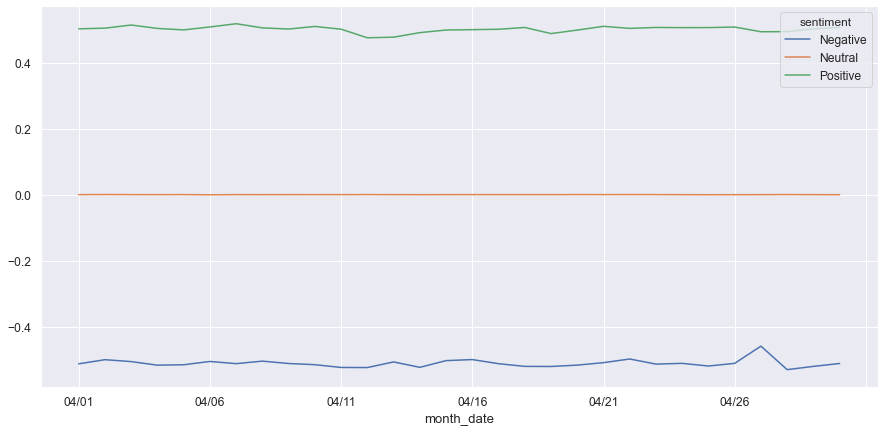

In [109]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
new_df.groupby(['month_date','sentiment']).mean()['compound'].unstack().plot(ax=ax)

In [113]:
# new_df.Datetime.astype('datetime64')[0].strftime("%m/%d")

In [114]:
# mean_python = new_df[new_df.sentiment=='Positive']['compound'].mean()

In [110]:
# new_df[new_df['sentiment']=='Positive'].groupby('month_date')['compound'].mean()

In [111]:
# new_df[new_df['sentiment']=='Negative'].groupby('month_date')['compound'].mean()

In [112]:
# import matplotlib.pyplot as plt

# # Average of python column by day
# mean_python = df[df.sentiment=='Positive']['compound'].resample('1 min').mean()

# # Average of js column by day
# mean_js = df[df.sentiment=='Negative']['compound'].resample('1 min').mean()

# # Plot mean python/js by day
# plt.plot(mean_python.index.minute, mean_python, color = 'green')
# plt.plot(mean_js.index.minute, mean_js, color = 'blue')

# # Add labels and show
# plt.xlabel('Minute'); plt.ylabel('Frequency')
# plt.title('Language mentions over time')
# plt.legend(('#python', '#js'))
# plt.show()

In [ ]:
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=RON\SQLEXPRESS;'
                      'Database=TestDB;'
                      'Trusted_Connection=yes;')
 
cursor = conn.cursor()